In [1]:
# Paquetes necesarios

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [2]:
# Constantes físicas

H = 1.660538921e-24
k = 1.3806488e-23
H_entre_k = H/k

# rho = mu*H*P/(k*T) con esa k, rho se queda en g/cm^3

In [3]:
# ---------------------------------- FUNCIONES --------------------------------------------------------

In [4]:
#----------------------------------Funciones numeradas---------------------------------------------

In [5]:
def FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i):
    P_delta1_i = h*P_f_i - h*P_f_i_anterior
    P_delta2_i = h*P_f_i - 2*h*P_f_i_anterior + h*P_f_i_anterior_anterior
    T_delta1_i = h*T_f_i - h*T_f_i_anterior
    T_delta2_i = h*T_f_i - 2*h*T_f_i_anterior + h*T_f_i_anterior_anterior
    P_est = P_i + h*P_f_i + (1/2)*P_delta1_i + (5/12)*P_delta2_i
    T_est = T_i + h*T_f_i + (1/2)*T_delta1_i
    return P_est,T_est

In [6]:
def FUNCION_4 (mu,P_est,T_est,Mtot,r_i,P_i,h,P_f_i):
    P_f_cal = -8.084*mu*(P_est/T_est)*(Mtot/(r_i)**2)
    P_delta1_cal = h*P_f_cal-h*P_f_i
    P_cal = P_i + h*P_f_cal - 0.5*P_delta1_cal
    return P_cal,P_f_cal

In [7]:
def FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i):
    T_f_cal = -0.01679*Z*(1+X)*(mu**2)*(P_cal**2/T_est**8.5)*(Ltot/(r_i**2))
    T_delta1_cal = h*T_f_cal-h*T_f_i
    T_cal = T_i + h*T_f_cal -0.5*T_delta1_cal
    return T_cal,T_f_cal


In [8]:
def FUNCION_3 (mu,h,P_cal,T_cal,r_i,Mtot,M_f_i):
    M_f_cal = (0.01523*mu*P_cal*(r_i**2))/(T_cal)
    M_delta1_cal = h*M_f_cal-h*M_f_i
    M_cal = Mtot + h*M_f_cal -0.5*M_delta1_cal
    return M_cal,M_f_cal

In [9]:
# Se define una nueva función, casi igual que la 3, pero que esta vez coge las Pest,Test y Mi
def FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i):
    if T_est == 0:
        M_f_cal = 0
    else:
        M_f_cal = 0.01523*mu*(P_est*(r_i**2))/(T_est)
    M_delta1_cal = h*M_f_cal-h*M_f_i
    M_cal = M_i + h*M_f_cal -0.5*M_delta1_cal
    return M_cal,M_f_cal

In [10]:
# Se define una nueva función, casi igual que la 4, pero que esta vez coge Mcal
def FUNCION_4b (mu,P_est,T_est,M_cal,r_i,P_i,h,P_f_i):
    P_f_cal = -8.084*mu*(P_est/T_est)*(M_cal/(r_i)**2)
    P_delta1_cal = h*P_f_cal-h*P_f_i
    P_cal = P_i + h*P_f_cal - 0.5*P_delta1_cal
    return P_cal,P_f_cal

In [11]:
def FUNCION_6 (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,Ltot,L_f_i,L_f_i_anterior):
    T = T_cal*10000000
    epsilon,epsilon_1,nu,X1,X2,Ciclo = NUCLEAR (T,X,Z,rho_i)
    L_f_cal = 0.01845*epsilon_1*X1*X2*(10**nu)*(mu**2)*(P_cal**2)*(T_cal**(nu-2))*(r_i**2)
    L_delta1_cal = h*L_f_cal-h*L_f_i
    L_delta2_cal = h*L_f_cal - 2*h*L_f_i + h*L_f_i_anterior 
    L_cal = Ltot + h*L_f_cal - (1/2)*L_delta1_cal - (1/12)*L_delta2_cal
    return L_cal,L_f_cal,Ciclo,epsilon
    

In [12]:
# Se define una nueva función que es casi como la 6 pero esta vez coge Li,Test,Pcal
def FUNCION_6b (r_i,mu,h,T_est,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior):
    T = T_est*10000000
    epsilon,epsilon_1,nu,X1,X2,Ciclo = NUCLEAR (T,X,Z,rho_i)
    L_f_cal = 0.01845*epsilon_1*X1*X2*(10**nu)*(mu**2)*(P_cal**2)*(T_est**(nu-2))*(r_i**2)
    L_delta1_cal = h*L_f_cal-h*L_f_i
    L_delta2_cal = h*L_f_cal - 2*h*L_f_i + h*L_f_i_anterior 
    L_cal = L_i + h*L_f_cal - (1/2)*L_delta1_cal - (1/12)*L_delta2_cal
    return L_cal,L_f_cal,Ciclo,epsilon

In [13]:
def FUNCION_9 (T_cal,P_cal,P_f_cal,T_f_cal):
    n_mas_1 = (T_cal/P_cal)*(P_f_cal/T_f_cal)
    return n_mas_1

In [14]:
def FUNCION_2bis (T_i,h,T_f_i,T_f_i_anterior):
    T_delta1_i = h*T_f_i - h*T_f_i_anterior
    T_est = T_i + h*T_f_i + 0.5*T_delta1_i
    return T_est
    

In [15]:
def POLITROPO (K_prima,T_est):
    P_est = K_prima*(T_est**2.5)
    return P_est

In [16]:
# Ahora coge Tcal y da Pcal
def POLITROPO_b (K_prima,T_cal):
    P_cal = K_prima*(T_cal**2.5)
    return P_cal

In [17]:
# Se define una nueva función que es casi como la 6 pero esta vez coge Li,Tcal,Pcal
def FUNCION_6c (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior):
    T = T_cal*10000000
    epsilon,epsilon_1,nu,X1,X2,Ciclo = NUCLEAR (T,X,Z,rho_i)
    if T_cal == 0:
        L_f_cal = 0
    else:
        L_f_cal = 0.01845*epsilon_1*X1*X2*(10**nu)*(mu**2)*(P_cal**2)*(T_cal**(nu-2))*(r_i**2)
    L_delta1_cal = h*L_f_cal-h*L_f_i
    L_delta2_cal = h*L_f_cal - 2*h*L_f_i + h*L_f_i_anterior 
    L_cal = L_i + h*L_f_cal - (1/2)*L_delta1_cal - (1/12)*L_delta2_cal
    return L_cal,L_f_cal,Ciclo,epsilon

In [18]:
def FUNCION_7bis (mu,h,M_cal,r_i,T_est,T_f_i,T_i):
    if r_i == 0:
        T_cal = T_est
        T_f_cal = 0
    else:
        T_f_cal = -3.234*mu*(M_cal/r_i**2)
        T_delta1_cal = h*T_f_cal - h*T_f_i
        T_cal = T_i + h*T_f_cal - 0.5*T_delta1_cal
    return T_cal,T_f_cal

In [19]:
#-----------------------------Funciones más largas-------------------------------------------------

In [20]:
def INICIAL_SUP(i,r_i,mu,Mtot,Ltot,X,Z):
    T_i = 1.9022*mu*Mtot*(1/r_i-1/Rtot)
    P_i = 10.645*(Mtot/(mu*Z*(1+X)*Ltot))**(0.5)*T_i**(4.25)
    P_f_i = -8.084*mu*P_i*Mtot/(T_i*r_i**2)
    T_f_i = -0.01679*Z*(1+X)*mu**2*P_i**2*Ltot/(T_i**(8.5)*r_i**2)
    M_f_i = 0.0
    L_f_i = 0.0
    capa = i
    return T_i , P_i , capa, P_f_i, T_f_i, M_f_i, L_f_i

In [21]:
def INICIAL_CENTRO (i,r_i,mu,K_prima,Tc,H,k,X,Z):
    
    M_i = 0.005077*mu*K_prima*(Tc**1.5)*(r_i**3)
    T_i = Tc - 0.008207*(mu**2)*K_prima*(Tc**1.5)*(r_i**2)
    P_i = K_prima*(T_i**2.5)
    rho_i = ((mu*P_i)/T_i)*(H_entre_k)
    Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_i*1e7)**(3.5))
    T = T_i*10000000
    epsilon,epsilon_1,nu,X1,X2,Ciclo = NUCLEAR (T,X,Z,rho_i)
    L_i = 0.006150*epsilon_1*X1*X2*(10**nu)*(mu**2)*(K_prima**2)*(Tc**(3 + nu))*(r_i**3)
    if r_i == 0:
        P_f_i = 0
        T_f_i = 0
    else:
        P_f_i = -8.084*mu*K_prima*(T_i**2.5)*(M_i/r_i**2)
        T_f_i = -3.234*mu*(M_i/r_i**2)
    M_f_i = 0.01523*mu*K_prima*(T_i**1.5)*(r_i**2)
    L_f_i = 0.01845*epsilon_1*X1*X2**(10**nu)*(mu**2)*(K_prima**2)*(T**(3 + nu))*(r_i**2)
    capa = i
    return capa,T_i,P_i,M_i,L_i,T_f_i,P_f_i,M_f_i,L_f_i,rho_i,Kappa_i,epsilon

In [22]:
# Definimos una función que te calcula qué ciclo nuclear es más eficaz según la T, además de los
# valores de epsilon, epsilon1, nu, etc del ciclo determinado el más eficaz.
#Cuidado con la temperatura. Esta función la coge en K, pero en el modelo se trabaja con 10e07 K
def NUCLEAR (T,X,Z,rho_i):
    T_6 = T/1000000
    if 4 < T_6 < 6:
        epsilon_pp_1 = 10**(-6.84)
        nu_pp = 6
    elif 6 < T_6 < 9.5:
        epsilon_pp_1 = 10**(-6.04)
        nu_pp = 5
    elif 9.5 < T_6 < 12:
        epsilon_pp_1 = 10**(-5.56)
        nu_pp = 4.5
    elif 12 < T_6 < 16.5:
        epsilon_pp_1 = 10**(-5.02)
        nu_pp = 4
    elif 16.5 < T_6 < 24:
        epsilon_pp_1 = 10**(-4.40)
        nu_pp = 3.5
    else:
        epsilon_pp_1 = 0
        nu_pp = 1
    
    if 12 < T_6 < 16:
        epsilon_CN_1 = 10**(-22.2)
        nu_CN = 20
    elif 16 < T_6 < 22.5:
        epsilon_CN_1 = 10**(-19.8)
        nu_CN = 18
    elif 22.5 < T_6 < 27.5:
        epsilon_CN_1 = 10**(-17.1)
        nu_CN = 16
    elif 27.5 < T_6 < 36:
        epsilon_CN_1 = 10**(-15.6)
        nu_CN = 15
    elif 36 < T_6 < 50:
        epsilon_CN_1 = 10**(-12.5)
        nu_CN = 13
    else:
        epsilon_CN_1 = 0
        nu_CN = 1
    epsilon_pp = epsilon_pp_1*X*X*rho_i*(T_6**nu_pp)
    epsilon_CN = epsilon_CN_1*X*(1/3)*Z*rho_i*(T_6**nu_CN)
    if epsilon_pp > epsilon_CN:
        epsilon = epsilon_pp 
        epsilon_1 = epsilon_pp_1
        nu = nu_pp
        X1 = X
        X2 = X
        Ciclo = 'PP'
        return epsilon,epsilon_1,nu,X1,X2,Ciclo
    else:
        epsilon = epsilon_CN 
        epsilon_1 = epsilon_CN_1
        nu = nu_CN
        X1 = X
        X2 = (1/3)*Z
        Ciclo = 'CN'
        return epsilon,epsilon_1,nu,X1,X2,Ciclo

In [23]:
# Definimos todo el proceso de cálculo desde el centro como una función que nos proporcione el error
# relativo total en función de la Tc usada.

def INTEGRACION_DESDE_EL_CENTRO (Tc,r_inicial,r_primero,r_ultimo,h,mu,K_prima,H,k,X,Z,r0,P0,T0,L0,M0):
    # Fase inicial desde el centro
    lista = [0,1,2]
    P_f_centro = [None]*500
    T_f_centro = [None]*500
    M_f_centro = [None]*500
    L_f_centro = [None]*500
    T_centro = [None]*500
    P_centro = [None]*500
    M_centro = [None]*500
    L_centro = [None]*500
    rho_centro = [None]*500
    for i in lista:
        r_i = r_inicial + i*h
        capa,T_i,P_i,M_i,L_i,T_f_i,P_f_i,M_f_i,L_f_i,rho_i,Kappa_i,epsilon = INICIAL_CENTRO (i,r_i,mu,K_prima,Tc,H,k,X,Z)
        P_f_centro[i] = P_f_i
        T_f_centro[i] = T_f_i
        M_f_centro[i] = M_f_i
        L_f_centro[i] = L_f_i
        T_centro[i] = T_i
        P_centro[i] = P_i
        M_centro[i] = M_i
        L_centro[i] = L_i
        rho_centro[i] = rho_i
    
    
    
    # Fase A.2 desde el centro
    i = i + 1
    loop1 = True
    while loop1: 
        r_i = r_inicial + i*h
        P_i = P_centro[i-1]
        P_f_i = P_f_centro[i-1]
        P_f_i_anterior = P_f_centro[i-2]
        P_f_i_anterior_anterior = P_f_centro[i-3]
        T_i = T_centro[i-1]
        T_f_i = T_f_centro[i-1]
        T_f_i_anterior = T_f_centro[i-2]
        T_f_i_anterior_anterior = T_f_centro[i-3]
        M_i = M_centro[i-1]
        M_f_i = M_f_centro[i-1]
        M_f_i_anterior = M_f_centro[i-2]
        M_f_i_anterior_anterior = M_f_centro[i-3]
        L_i = L_centro[i-1]
        L_f_i = L_f_centro[i-1]
        L_f_i_anterior = L_f_centro[i-2]
        L_f_i_anterior_anterior = L_f_centro[i-3]
        T_est = FUNCION_2bis (T_i,h,T_f_i,T_f_i_anterior)
        loop2 = True
        while loop2:
            P_est = POLITROPO (K_prima,T_est)
            M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
            T_cal,T_f_cal = FUNCION_7bis (mu,h,M_cal,r_i,T_est,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        P_cal = POLITROPO_b (K_prima,T_cal)
        P_f_cal = -8.084*mu*K_prima*(T_cal**2.5)*(M_cal/r_i**2)
        rho_i = ((mu*P_cal)/T_cal)*(H_entre_k)
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6c (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
        if r_i <= (r_ultimo + 0.001):
            P_f_centro[i] = P_f_cal
            T_f_centro[i] = T_f_cal
            M_f_centro[i] = M_f_cal
            L_f_centro[i] = L_f_cal
            P_centro[i] = P_cal
            T_centro[i] = T_cal
            M_centro[i] = M_cal
            L_centro[i] = L_cal
            rho_centro[i] = rho_i
            i = i + 1  
        else:
            loop1 = False  
 


    
          
    # Valores en la frontera radiativa-convectiva por interpolación lineal desde abajo
    P_primero = P_centro[i-2]
    T_primero = T_centro[i-2]
    L_primero = L_centro[i-2]
    M_primero = M_centro[i-2]

    P_ultimo = P_centro[i-1]
    T_ultimo = T_centro[i-1]
    L_ultimo = L_centro[i-1]
    M_ultimo = M_centro[i-1]

    
    #y-yo = m(x-xo)

    m = (P_ultimo - P_primero)/(r_ultimo - r_primero)
    P0_centro = P_primero + m*(r0 - r_primero) 

    m = (T_ultimo - T_primero)/(r_ultimo - r_primero)
    T0_centro = T_primero + m*(r0 - r_primero)

    m = (L_ultimo - L_primero)/(r_ultimo - r_primero)
    L0_centro = L_primero + m*(r0 - r_primero)

    m = (M_ultimo - M_primero)/(r_ultimo - r_primero)
    M0_centro = M_primero + m*(r0 - r_primero)



    # Comparación de los valores en la frontera
    Error_rel_P = 100*abs(P0-P0_centro)/P0
    Error_rel_T = 100*abs(T0-T0_centro)/T0
    Error_rel_L = 100*abs(L0-L0_centro)/L0
    Error_rel_M = 100*abs(M0-M0_centro)/M0
    Error_rel_tot = ((Error_rel_P**2)+(Error_rel_T**2)+(Error_rel_L**2)+(Error_rel_M**2))**0.5


    return (Error_rel_tot)

In [24]:
def CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k):    
    
    # Esta función calcula todo el proceso desde la superficie, guardando los valores de la frontera.
    # Luego con varios valores de Tc, calcula el proceso desde el centro, comparando los valores
    # de la frontera obtenidos de esta forma con los ya guardados y calcula su error. Finalmente
    # devuelve con qué Tc se obtuvo el menor error, siendo esa la Tc óptima para el par Ltot,Rtot
    # introducidos como variables de entrada.
    
    
    # Fase pre-inicial desde la superficie (con las i negativas)
    r_inicial = 0.9*Rtot
    h = -0.9*Rtot/100
    lista = range(-11,0)
    P_f_inicial = [None]*len(lista)       
    T_f_inicial = [None]*len(lista)    
    M_f_inicial = [None]*len(lista)
    L_f_inicial = [None]*len(lista)
    T_inicial = [None]*len(lista)
    P_inicial = [None]*len(lista)
    M_inicial = [None]*len(lista)
    L_inicial = [None]*len(lista)
    rho_inicial = [None]*len(lista)
    for i in lista:
        r_i = r_inicial + i*h
        T_i,P_i,capa,P_f_i,T_f_i,M_f_i,L_f_i = INICIAL_SUP(i,r_i,mu,Mtot,Ltot,X,Z)
        rho_i = mu*H*P_i/(k*T_i)
        P_f_inicial[i] = P_f_i
        T_f_inicial[i] = T_f_i
        M_f_inicial[i] = M_f_i
        L_f_inicial[i] = L_f_i
        T_inicial[i] = T_i
        P_inicial[i] = P_i
        M_inicial[i] = Mtot
        L_inicial[i] = Ltot
        rho_inicial[i] = rho_i
            
 

    # Fase inicial desde la superficie
    lista = [0,1,2]
    P_f = [None]*101
    T_f = [None]*101
    M_f = [None]*101
    L_f = [None]*101
    T = [None]*101
    P = [None]*101
    M = [None]*101
    L = [None]*101
    rho = [None]*101
    for i in lista:
        r_i = r_inicial + i*h
        T_i,P_i,capa,P_f_i,T_f_i,M_f_i,L_f_i = INICIAL_SUP(i,r_i,mu,Mtot,Ltot,X,Z)
        rho_i = mu*H*P_i/(k*T_i)
        P_f[i] = P_f_i
        T_f[i] = T_f_i
        M_f[i] = M_f_i
        L_f[i] = L_f_i
        T[i] = T_i
        P[i] = P_i
        M[i] = Mtot
        L[i] = Ltot
        rho[i] = rho_i
            


    
    # Algoritmo A.1.1 desde la superficie
    i = i + 1
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                P_cal, P_f_cal = FUNCION_4 (mu,P_est,T_est,Mtot,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        M_cal,M_f_cal = FUNCION_3 (mu,h,P_cal,T_cal,r_i,Mtot,M_f_i)
        rho_i = mu*H*P_cal/(k*T_cal)
        if (abs (M_cal - Mtot))/M_cal > 0.0001:
            loop1 = False
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = 0
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = Ltot
            rho[i] = rho_i
            i = i + 1

        
        
    # Fase A.1.2 desde la superficie
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
                P_cal,P_f_cal = FUNCION_4b (mu,P_est,T_est,M_cal,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        rho_i = mu*H*P_cal/(k*T_cal)
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6 (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,Ltot,L_f_i,L_f_i_anterior)
        if (abs (L_cal - Ltot))/L_cal > 0.0001:
            loop1 = False
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            i = i + 1
        
        
        
    # Fase A.1.3 desde la superficie
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
                P_cal,P_f_cal = FUNCION_4b (mu,P_est,T_est,M_cal,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6b (r_i,mu,h,T_est,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        rho_i = mu*H*P_cal/(k*T_cal)
        n_mas_1 = FUNCION_9 (T_cal,P_cal,P_f_cal,T_f_cal)
        if n_mas_1 <= 2.499:
            loop1 = False
            K_prima = P_cal/(T_cal**2.5)
            n_mas_1_primero = n_mas_1           # Se coge la capa, radio y valor de n+1 para
            r_primero = r_i                     # para la primera capa convectiva, además de la
            i_primero = i                       # de la cte. del polítropo
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            n_mas_1_ultimo = n_mas_1            # Se coge la capa, radio y valor de n+1 y magnitudes
            i_ultimo = i                        # de la última capa radiativa
            r_ultimo = r_i
            P_ultimo = P_cal
            T_ultimo = T_cal
            M_ultimo = M_cal
            L_ultimo = L_cal
            i = i + 1
        
        
    
    # Fase A.2 desde la superficie
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        T_est = FUNCION_2bis (T_i,h,T_f_i,T_f_i_anterior)
        if T_est < 0:
            T_est = 0
        loop2 = True
        while loop2:
            P_est = POLITROPO (K_prima,T_est)
            M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
            T_cal,T_f_cal = FUNCION_7bis (mu,h,M_cal,r_i,T_est,T_f_i,T_i)
            if T_cal == 0:
                break
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        if T_cal < 0:
            T_cal = 0
        P_cal = POLITROPO_b (K_prima,T_cal)
        if r_i > 0:
            P_f_cal = -8.084*mu*K_prima*(T_cal**2.5)*(M_cal/r_i**2)
        else:
            P_f_cal = 0
        if T_cal == 0:
            rho_i = 0
        else:
            rho_i = ((mu*P_cal)/T_cal)*(H_entre_k)
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6c (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
        if r_i >= 0:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            i = i + 1  
        else:
            loop1 = False
            
            
    # Valores en la frontera radiativa-convectiva por interpolación lineal desde arriba

    P_primero = P[i_primero]     # Se recogen los valores de las magnitudes en la primera
    T_primero = T[i_primero]     # capa convectiva.
    L_primero = L[i_primero]
    M_primero = M[i_primero]

    # Usando los valores de n+1 y los radios de ambos lados de la frontera, se halla la pendiente
    # de la recta de interpolación, que despúes se usa para hallar el radio para el que n+1 es
    # exactamente 2.5 (r0).

    m = (n_mas_1_ultimo - n_mas_1_primero)/(r_ultimo - r_primero)
    r0 = (2.50 - n_mas_1_primero)/m + r_primero
    

    # Mismo procedimiento, primero se halla la pendiente, pero luego en este caso se quiere hallar el
    # valor de cada magnitud en el radio exacto de la frontera (se nombran con un cero).
    m = (P_ultimo - P_primero)/(r_ultimo - r_primero)
    P0 = P_primero + m*(r0 - r_primero) 

    m = (T_ultimo - T_primero)/(r_ultimo - r_primero)
    T0 = T_primero + m*(r0 - r_primero)

    m = (L_ultimo - L_primero)/(r_ultimo - r_primero)
    L0 = L_primero + m*(r0 - r_primero)

    m = (M_ultimo - M_primero)/(r_ultimo - r_primero)
    M0 = M_primero + m*(r0 - r_primero)
    
    
    
    # Integración desde el núcleo, cálculo de los valores en la frontera desde abajo y el error
    # relativo entre ellos.
    
    r_inicial = 0.0               
    h = 0.9*Rtot/100
    Tc_lista = np.arange(1.6, 2.2, 0.01).tolist()
    Error_rel_tot_lista = [None]*len(Tc_lista)
    k = 0
    for Tc in Tc_lista:
        Error_rel_tot = INTEGRACION_DESDE_EL_CENTRO (Tc,r_inicial,r_primero,r_ultimo,h,mu,K_prima,H,k,X,Z,r0,P0,T0,L0,M0)
        Error_rel_tot_lista[k] = Error_rel_tot
        k = k + 1
    Error_rel_tot_min = min (Error_rel_tot_lista)
    minpos = Error_rel_tot_lista.index(Error_rel_tot_min)
    Tc_optima = Tc_lista[minpos]
    
    return (Tc_optima,Error_rel_tot_min)





In [25]:
#---------------------------------El modelo completo-----------------------------------------------

In [26]:
def MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k):
    
    # Aquí esta vez añadimos las instrucciones de print para cada capa, y al final se grafican 
    # las magnitudes en función del radio.
    # Como ya se sabe cuál es la Tc óptima, aquí se coge como variable de entrada,
    # sin tener que volver a incluir el proceso de su cálculo.
    

    print ('------------------------------- Modelo completo ---------------------------------------------')
    print ('                                                                                             ')
    print ('        X =','{0:.3f}'.format(X),'       ','Rtot =','{0:.3f}'.format(Rtot))
    print ('        Y =','{0:.3f}'.format(Y),'       ','Ltot =','{0:.3f}'.format(Ltot))
    print ('        Mtot =','{0:.3f}'.format(Mtot),'    ','Tc =','{0:.3f}'.format(Tc))
    print ('                                                                                             ')
    print ('                                                                                             ')
    print ('E   fase   i     r         P         T          L         M       n+1')

    # Fase pre-inicial desde la superficie (la que no se había hallado antes)
    r_inicial = 0.9*Rtot
    h = -0.9*Rtot/100
    lista = range(-11,0)
    P_f_inicial = [None]*len(lista)
    T_f_inicial = [None]*len(lista)
    M_f_inicial = [None]*len(lista)
    L_f_inicial = [None]*len(lista)
    T_inicial = [None]*len(lista)
    P_inicial = [None]*len(lista)
    M_inicial = [None]*len(lista)
    L_inicial = [None]*len(lista)
    rho_inicial = [None]*len(lista)
    Kappa_inicial = [None]*len(lista)
    epsilon_lista_inicial = [None]*len(lista)
    for i in lista:
        r_i = r_inicial + i*h
        T_i,P_i,capa,P_f_i,T_f_i,M_f_i,L_f_i = INICIAL_SUP(i,r_i,mu,Mtot,Ltot,X,Z)
        rho_i = mu*H*P_i/(k*T_i)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_i*1e7)**(3.5))
        epsilon_i = 0
        P_f_inicial[i] = P_f_i
        T_f_inicial[i] = T_f_i
        M_f_inicial[i] = M_f_i
        L_f_inicial[i] = L_f_i
        T_inicial[i] = T_i
        P_inicial[i] = P_i
        M_inicial[i] = Mtot
        L_inicial[i] = Ltot
        rho_inicial[i] = rho_i
        Kappa_inicial[i] = Kappa_i
        epsilon_lista_inicial[i] = epsilon_i
        print ('--','^^^^^^',capa,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_i),'{0:.7f}'.format(T_i),'{0:.7f}'.format(Ltot),'{0:.7f}'.format(Mtot))    
 

     # Fase inicial desde la superficie
    lista = [0,1,2]
    P_f = [None]*(101)
    T_f = [None]*101
    M_f = [None]*101
    L_f = [None]*101
    T = [None]*101
    P = [None]*101
    M = [None]*101
    L = [None]*101
    rho = [None]*101
    Kappa = [None]*101
    epsilon_lista = [None]*101
    for i in lista:
        r_i = r_inicial + i*h
        T_i,P_i,capa,P_f_i,T_f_i,M_f_i,L_f_i = INICIAL_SUP(i,r_i,mu,Mtot,Ltot,X,Z)
        rho_i = mu*H*P_i/(k*T_i)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_i*1e7)**(3.5))
        epsilon_i = 0
        P_f[i] = P_f_i
        T_f[i] = T_f_i
        M_f[i] = M_f_i
        L_f[i] = L_f_i
        T[i] = T_i
        P[i] = P_i
        M[i] = Mtot
        L[i] = Ltot
        rho[i] = rho_i
        Kappa[i] = Kappa_i
        epsilon_lista[i] = epsilon_i
        print ('--','INICIO ',capa,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_i),'{0:.7f}'.format(T_i),'{0:.7f}'.format(Ltot),'{0:.7f}'.format(Mtot))    


    
    # Algoritmo A.1.1 desde la superficie
    i = i + 1
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                P_cal, P_f_cal = FUNCION_4 (mu,P_est,T_est,Mtot,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        M_cal,M_f_cal = FUNCION_3 (mu,h,P_cal,T_cal,r_i,Mtot,M_f_i)
        rho_i = mu*H*P_cal/(k*T_cal)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_cal*1e7)**(3.5))
        epsilon_i = 0
        if (abs (M_cal - Mtot))/M_cal > 0.0001:
            loop1 = False
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = 0
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = Ltot
            rho[i] = rho_i
            Kappa[i] = Kappa_i
            epsilon_lista[i] = epsilon_i
            print ('--','A.1.1  ',i,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_cal),'{0:.7f}'.format(T_cal),'{0:.7f}'.format(Ltot),'{0:.7f}'.format(Mtot))
            i = i + 1

        
        
    # Fase A.1.2 desde la superficie
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
                P_cal,P_f_cal = FUNCION_4b (mu,P_est,T_est,M_cal,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        rho_i = mu*H*P_cal/(k*T_cal)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_cal*1e7)**(3.5))                                 
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6 (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,Ltot,L_f_i,L_f_i_anterior)
        epsilon_i= epsilon
        if (abs (L_cal - Ltot))/L_cal > 0.0001:
            loop1 = False          
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            Kappa[i] = Kappa_i
            epsilon_lista[i] = epsilon_i
            print ('--','A.1.2  ',i,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_cal),'{0:.7f}'.format(T_cal),'{0:.7f}'.format(Ltot),'{0:.7f}'.format(M_cal))
            i = i + 1
        
        
        
    # Fase A.1.3 desde la superficie
    Ciclo_exterior = [None]
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        P_est , T_est = FUNCION_2 (P_f_i,T_f_i,P_f_i_anterior,T_f_i_anterior,P_f_i_anterior_anterior,T_f_i_anterior_anterior,h,P_i,T_i)
        loop2 = True
        while loop2:
            loop3 = True
            while loop3:
                M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
                P_cal,P_f_cal = FUNCION_4b (mu,P_est,T_est,M_cal,r_i,P_i,h,P_f_i)
                if (abs (P_cal - P_est))/P_cal < 0.0001:
                    loop3 = False
                else:
                    P_est = P_cal
            L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6b (r_i,mu,h,T_est,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
            epsilon_i = epsilon
            Ciclo_exterior.append(Ciclo)  #se comienza a guardar el tipo de ciclo en una lista
            T_cal,T_f_cal = FUNCION_7 (X,Z,mu,P_cal,Ltot,T_est,r_i,h,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        rho_i = mu*H*P_cal/(k*T_cal)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_cal*1e7)**(3.5))
        n_mas_1 = FUNCION_9 (T_cal,P_cal,P_f_cal,T_f_cal)
        if n_mas_1 <= 2.49999:
            loop1 = False
            K_prima = P_cal/(T_cal**2.5)
            n_mas_1_primero = n_mas_1
            r_primero = r_i
            i_primero = i
        else:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            Kappa[i] = Kappa_i
            epsilon_lista[i] = epsilon_i
            n_mas_1_ultimo = n_mas_1
            i_ultimo = i
            r_ultimo = r_i
            P_ultimo = P_cal
            T_ultimo = T_cal
            M_ultimo = M_cal
            L_ultimo = L_cal
            print (Ciclo,'A.1.3  ',i,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_cal),'{0:.7f}'.format(T_cal),'{0:.7f}'.format(L_cal),'{0:.7f}'.format(M_cal),'{0:.7f}'.format(n_mas_1))
            i = i + 1
           
    Ciclo_exterior = Ciclo_exterior[1:]    #Se elimina el primer término que era NoneType
    Ciclo_exterior.reverse()               # y se da la vuelta a la lista 
        
    
    # Fase A.2 desde la superficie
    loop1 = True
    while loop1:
        r_i = r_inicial + i*h
        P_i = P[i-1]
        P_f_i = P_f[i-1]
        P_f_i_anterior = P_f[i-2]
        P_f_i_anterior_anterior = P_f[i-3]
        T_i = T[i-1]
        T_f_i = T_f[i-1]
        T_f_i_anterior = T_f[i-2]
        T_f_i_anterior_anterior = T_f[i-3]
        M_i = M[i-1]
        M_f_i = M_f[i-1]
        M_f_i_anterior = M_f[i-2]
        M_f_i_anterior_anterior = M_f[i-3]
        L_i = L[i-1]
        L_f_i = L_f[i-1]
        L_f_i_anterior = L_f[i-2]
        L_f_i_anterior_anterior = L_f[i-3]
        T_est = FUNCION_2bis (T_i,h,T_f_i,T_f_i_anterior)
        if T_est < 0:
            T_est = 0
        loop2 = True
        while loop2:
            P_est = POLITROPO (K_prima,T_est)
            M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
            T_cal,T_f_cal = FUNCION_7bis (mu,h,M_cal,r_i,T_est,T_f_i,T_i)
            if T_cal == 0:
                break
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        if T_cal < 0:
            T_cal = 0
        P_cal = POLITROPO_b (K_prima,T_cal)
        if r_i > 0:
            P_f_cal = -8.084*mu*K_prima*(T_cal**2.5)*(M_cal/r_i**2)
        else:
            P_f_cal = 0
        if T_cal == 0:
            rho_i = 0
        else:
            rho_i = ((mu*P_cal)/T_cal)*(H_entre_k)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_cal*1e7)**(3.5))    
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6c (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
        epsilon_i = epsilon
        if r_i >= 0:
            P_f[i] = P_f_cal
            T_f[i] = T_f_cal
            M_f[i] = M_f_cal
            L_f[i] = L_f_cal
            P[i] = P_cal
            T[i] = T_cal
            M[i] = M_cal
            L[i] = L_cal
            rho[i] = rho_i
            Kappa[i] = Kappa_i
            epsilon_lista[i] = epsilon_i
            i = i + 1  
        else:
            loop1 = False
    
    
    
    # Fase inicial desde el centro
    longitud = 100 - i_ultimo
    Ciclo_lista = [None]*(longitud)
    Fase_lista = [None]*(longitud)
    r_inicial = 0.0
    h = -h
    lista = [0,1,2]
    P_f_centro = [None]*(longitud)
    T_f_centro = [None]*(longitud)
    M_f_centro = [None]*(longitud)
    L_f_centro = [None]*(longitud)
    T_centro = [None]*(longitud)
    P_centro = [None]*(longitud)
    M_centro = [None]*(longitud)
    L_centro = [None]*(longitud)
    rho_centro = [None]*(longitud)
    Kappa_centro = [None]*(longitud)
    epsilon_lista_centro = [None]*(longitud)
    for i in lista:
        r_i = r_inicial + i*h
        capa,T_i,P_i,M_i,L_i,T_f_i,P_f_i,M_f_i,L_f_i,rho_i,Kappa_i,epsilon = INICIAL_CENTRO (i,r_i,mu,K_prima,Tc,H,k,X,Z)
        epsilon_i = epsilon
        P_f_centro[i] = P_f_i
        T_f_centro[i] = T_f_i
        M_f_centro[i] = M_f_i
        L_f_centro[i] = L_f_i
        T_centro[i] = T_i
        P_centro[i] = P_i
        M_centro[i] = M_i
        L_centro[i] = L_i
        rho_centro[i] = rho_i
        Kappa_centro[i] = Kappa_i
        epsilon_lista_centro[i] = epsilon_i
        Ciclo_lista[i] = '--'
        Fase_lista[i] = 'CENTRO'
    
    
    
    # Fase A.2 desde el centro
    i = i + 1
    loop1 = True
    while loop1: 
        r_i = r_inicial + i*h
        P_i = P_centro[i-1]
        P_f_i = P_f_centro[i-1]
        P_f_i_anterior = P_f_centro[i-2]
        P_f_i_anterior_anterior = P_f_centro[i-3]
        T_i = T_centro[i-1]
        T_f_i = T_f_centro[i-1]
        T_f_i_anterior = T_f_centro[i-2]
        T_f_i_anterior_anterior = T_f_centro[i-3]
        M_i = M_centro[i-1]
        M_f_i = M_f_centro[i-1]
        M_f_i_anterior = M_f_centro[i-2]
        M_f_i_anterior_anterior = M_f_centro[i-3]
        L_i = L_centro[i-1]
        L_f_i = L_f_centro[i-1]
        L_f_i_anterior = L_f_centro[i-2]
        L_f_i_anterior_anterior = L_f_centro[i-3]
        T_est = FUNCION_2bis (T_i,h,T_f_i,T_f_i_anterior)
        loop2 = True
        while loop2:
            P_est = POLITROPO (K_prima,T_est)
            M_cal,M_f_cal = FUNCION_3b (mu,h,P_est,T_est,r_i,M_i,M_f_i)
            T_cal,T_f_cal = FUNCION_7bis (mu,h,M_cal,r_i,T_est,T_f_i,T_i)
            if (abs (T_cal - T_est))/T_cal < 0.0001:
                loop2 = False
            else:
                T_est = T_cal
        P_cal = POLITROPO_b (K_prima,T_cal)
        rho_i = mu*H*P_cal/(k*T_cal)
        Kappa_i = 4.34e25*Z*(1+X)*rho_i/((T_cal*1e7)**(3.5))
        L_cal,L_f_cal,Ciclo,epsilon = FUNCION_6c (r_i,mu,h,T_cal,P_cal,X,Z,rho_i,L_i,L_f_i,L_f_i_anterior)
        epsilon_i = epsilon
        if i > (longitud-1):
            break
        if r_i < r_ultimo:
            Ciclo_lista[i] = Ciclo
            Fase_lista[i] = 'CONVEC'
            P_f_centro[i] = P_f_cal
            T_f_centro[i] = T_f_cal
            M_f_centro[i] = M_f_cal
            L_f_centro[i] = L_f_cal
            P_centro[i] = P_cal
            T_centro[i] = T_cal
            M_centro[i] = M_cal
            L_centro[i] = L_cal
            rho_centro[i] = rho_i
            Kappa_centro[i] = Kappa_i
            epsilon_lista_centro[i] = epsilon_i
            P_primero_modelo = P_cal
            i = i + 1  
        else:
            loop1 = False
    
    
    # Ahora imprimimos la parte calculada desde el centro de forma que aparezca al final
    r_inicial = 0.9*Rtot
    h = -h
    i = i_primero
    elemento = -1
    while i <= 100:
        r_i = r_inicial + i*h
        if elemento == -1:
            print (Ciclo_lista[elemento],Fase_lista[elemento],'',i,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_centro[elemento]),'{0:.7f}'.format(T_centro[elemento]),'{0:.7f}'.format(L_centro[elemento]),'{0:.7f}'.format(M_centro[elemento]),'{0:7f}'.format(n_mas_1_primero))
            i = i + 1
            elemento = elemento - 1
            continue
        print (Ciclo_lista[elemento],Fase_lista[elemento],'',i,'{0:.5f}'.format(r_i),'{0:.7f}'.format(P_centro[elemento]),'{0:.7f}'.format(T_centro[elemento]),'{0:.7f}'.format(L_centro[elemento]),'{0:.7f}'.format(M_centro[elemento]))
        i = i + 1
        elemento = elemento - 1
    
    
    i_PP_primero = 0                               #se obtiene para qué posición de la lista de
    for i in range(0,len(Ciclo_lista)):            #lso ciclos se cambia de CNO a PP
        if Ciclo_lista[i] == 'PP':
            i_PP_primero = i
        
    Ciclo_lista.extend(Ciclo_exterior)
    
    
    
    P_primero = P[i_primero]     # Se recogen los valores de las magnitudes en la primera
    T_primero = T[i_primero]     # capa convectiva.
    L_primero = L[i_primero]
    M_primero = M[i_primero]
    
    m = (n_mas_1_ultimo - n_mas_1_primero)/(r_ultimo - r_primero)
    r0 = (2.50 - n_mas_1_primero)/m + r_primero
    
    m = (P_ultimo - P_primero)/(r_ultimo - r_primero)
    P0 = P_primero + m*(r0 - r_primero) 

    m = (T_ultimo - T_primero)/(r_ultimo - r_primero)
    T0 = T_primero + m*(r0 - r_primero)

    m = (L_ultimo - L_primero)/(r_ultimo - r_primero)
    L0 = L_primero + m*(r0 - r_primero)

    m = (M_ultimo - M_primero)/(r_ultimo - r_primero)
    M0 = M_primero + m*(r0 - r_primero)
    
    # Finalmente se grafican las funciones. Para ello, hay que juntar las diferentes listas que 
    # se han estado calculando.

    P_inicial.reverse()    # Se invierten de orden los elementos de las primeras capas superficiales de la 
    T_inicial.reverse()    # estrella.
    L_inicial.reverse()
    M_inicial.reverse()
    rho_inicial.reverse()
    Kappa_inicial.reverse()
    epsilon_lista_inicial.reverse()
    

    P = P[0:i_primero]          # Se cogen sólo las capas hasta la frontera.
    T = T[0:i_primero]
    L = L[0:i_primero]
    M = M[0:i_primero]
    rho = rho[0:i_primero]
    Kappa = Kappa[0:i_primero]
    epsilon_lista = epsilon_lista[0:i_primero]
    

    P.reverse()
    T.reverse()            # Y se invierten
    L.reverse()
    M.reverse()
    rho.reverse()
    Kappa.reverse()
    epsilon_lista.reverse()

    P_centro.extend(P)    # A la lista de las magnitudes calculadas desde el centro hasta la frontera,
    T_centro.extend(T)    # se añaden los anteriores, que corresponden a la parte exterior, pero ya
    L_centro.extend(L)    # ordenados de forma que la lista avanza a medida que el radio aumenta.
    M_centro.extend(M)
    rho_centro.extend(rho)
    Kappa_centro.extend(Kappa)
    epsilon_lista_centro.extend(epsilon_lista)
    

    P_centro.extend(P_inicial)
    T_centro.extend(T_inicial)
    L_centro.extend(L_inicial)
    M_centro.extend(M_inicial)
    rho_centro.extend(rho_inicial)
    Kappa_centro.extend(Kappa_inicial)
    epsilon_lista_centro.extend(epsilon_lista_inicial)
    
    
    P = P_centro
    T = T_centro           # Se redefinen las listas, ya completas, con el nombre de la variable 
    L = L_centro           # correspondiente.
    M = M_centro
    rho = rho_centro
    Kappa = Kappa_centro
    epsilon = epsilon_lista_centro
    

    h = - h
    r = np.arange(0.0,Rtot,h)          # Se genera la lista con los radios, para el eje X


    
    # Normalización de los parámetros 

    
    P_norm = [x / max(P) for x in P]
    T_norm = [x / max(T) for x in T]
    L_norm = [x / max(L) for x in L]
    M_norm = [x / max(M) for x in M]
    
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Magnitudes normalizadas')
    plt.plot(r,P_norm,label='P')  
    plt.plot(r,T_norm,label='T')                 
    plt.plot(r,L_norm,label='L enc.')                 
    plt.plot(r,M_norm,label='M enc.')
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    plt.legend(loc='center right')
    
    
    print ('                          ')
           
    # Se usa plot para cada magnitud. 
    
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Presión ($10^{15}$ din/$cm^2$)')
    plt.plot(r,P) 
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    

    print ('                     ')
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Temperatura ($10^7$ K)')
    plt.plot(r,T)
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    

    print ('                     ')
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Luminosidad encerrada ($10^{33}$ erg/s)')
    plt.plot(r,L)
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
       
    
    print ('                     ')

    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Masa encerrada ($10^{33}$ g)')
    plt.plot(r,M)
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    
    
    print ('                     ')
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Densidad (g/$cm^3$)')
    plt.plot(r,rho)
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    
    
    print ('                     ')
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Opacidad ($cm^{2} g^{-1}$)')
    plt.plot(r,Kappa)
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    
    
    print ('                     ')
    
    r_CNO = r[0:i_PP_primero]                                  #se dividen los ciclos en segmentos
    epsilon_CNO = epsilon[0:i_PP_primero]                      #CNO, PP y sin reacciones
    r_PP = r[i_PP_primero:len(Ciclo_lista)]
    epsilon_PP = epsilon[i_PP_primero:len(Ciclo_lista)]
    r_resto = r[len(Ciclo_lista):]
    epsilon_resto = epsilon[len(Ciclo_lista):]
    
    
    
    plt.figure()
    plt.xlabel('Radio ($10^{10}$ cm)')
    plt.ylabel('Ritmo de generación de energía ($erg$'+' '+'$g^{-1} s^{-1}$)')
    plt.plot(r_CNO,epsilon_CNO,'r',label='CNO')
    plt.plot(r_PP,epsilon_PP,'b',label='PP')
    plt.plot(r_resto,epsilon_resto,'k',label='Sin reacciones nucleares')
    plt.axvline(r0, color='k', lw=1,dashes=[2, 2])
    plt.legend()
    
    
    return (P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima)

In [27]:
# -------------------------------  MODELO DE PRUEBA ---------------------------------------------

In [28]:
# Parámetros constantes
X = 0.75
Y = 0.22
Z = 1 - X - Y
mu = 1/(2*X+0.75*Y+0.5*Z)
Mtot = 5.0

------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.750         Rtot = 11.500
        Y = 0.220         Ltot = 70.000
        Mtot = 5.000      Tc = 2.000
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 11.48850 0.0000000 0.0004928 70.0000000 5.0000000
-- ^^^^^^ -10 11.38500 0.0000000 0.0049726 70.0000000 5.0000000
-- ^^^^^^ -9 11.28150 0.0000000 0.0095346 70.0000000 5.0000000
-- ^^^^^^ -8 11.17800 0.0000002 0.0141811 70.0000000 5.0000000
-- ^^^^^^ -7 11.07450 0.0000008 0.0189145 70.0000000 5.0000000
-- ^^^^^^ -6 10.97100 0.0000020 0.0237371 70.0000000 5.0000000
-- ^^^^^^ -5 10.86750 0.0000045 0.0286517 70.0000000 5.00

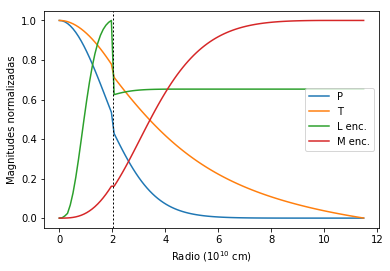

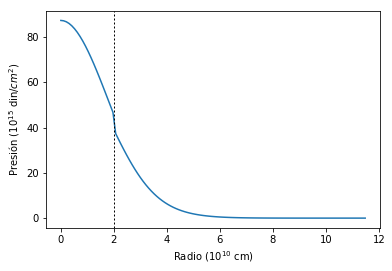

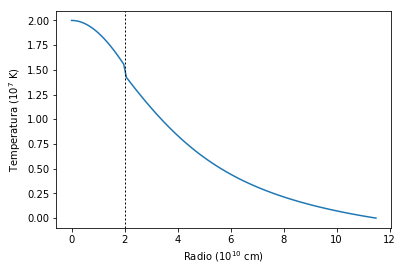

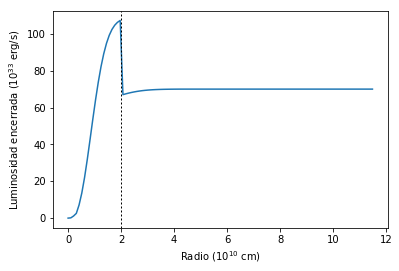

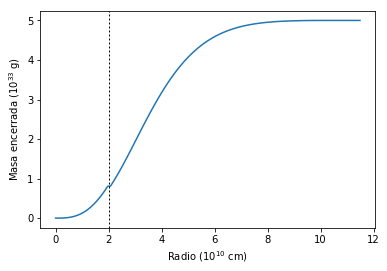

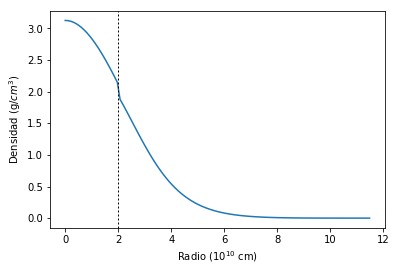

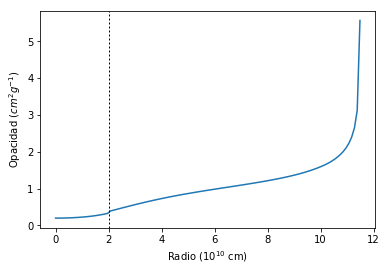

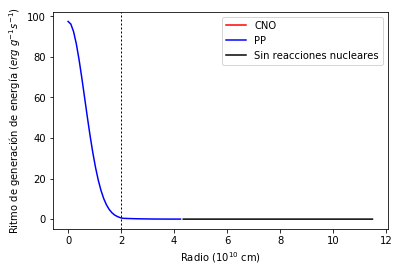

In [29]:
# Modelo con los parámetros iniciales
Tc = 2.0
Rtot = 11.5
Ltot = 70.0
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)
r_inicial = 0.0
h = 0.9*Rtot/100
Error_rel_tot = INTEGRACION_DESDE_EL_CENTRO (Tc,r_inicial,r_primero,r_ultimo,h,mu,K_prima,H,k,X,Z,r0,P0,T0,L0,M0)
print('El error con estos parámetros iniciales es','{0:.2f}'.format(Error_rel_tot),'%')

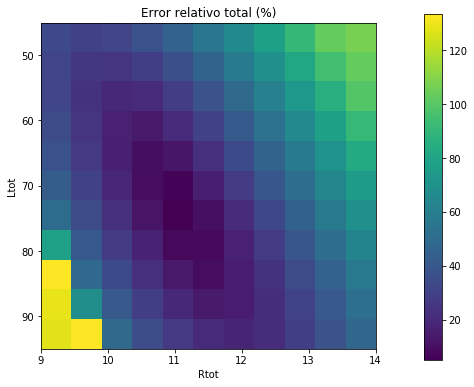

In [30]:
# Búsqueda de los parámetros óptimos
Rtot_central = 11.5
Ltot_central = 70.0
delta_Ltot = 5
delta_Rtot = 0.5
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

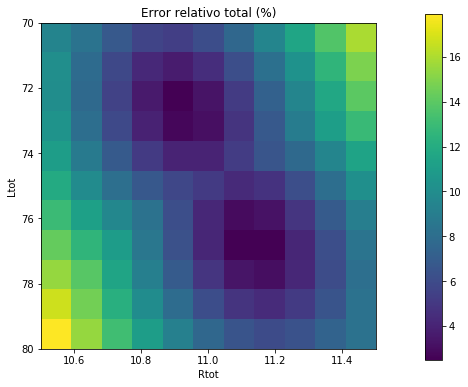

In [31]:
Rtot_central = 11.0
Ltot_central = 75.0
delta_Ltot = 1
delta_Rtot = 0.1
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Tc óptima = 1.960     Rtot óptima = 11.100     Ltot óptima = 76.900     Error rel. tot. = 2.477 %
                                                                 
------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.750         Rtot = 11.100
        Y = 0.220         Ltot = 76.900
        Mtot = 5.000      Tc = 1.960
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 11.08890 0.0000000 0.0005105 76.9000000 5.0000000
-- ^^^^^^ -10 10.98900 0.0000000 0.0051518 76.9000000 5.0000000
-- ^^^^^^ -9 10.88910 0.0000000 0.0098782 76.9000000 5.0000000
-- ^^^^^^ -8 10.78920 0.0000002 0.0146922 76.9000000 5.0000000
-- ^^^^^^ -7 10.689

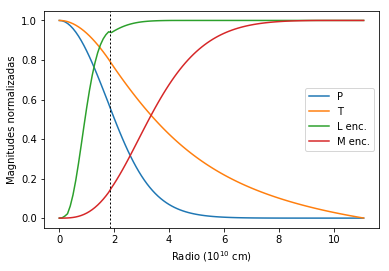

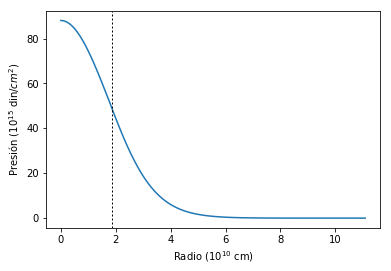

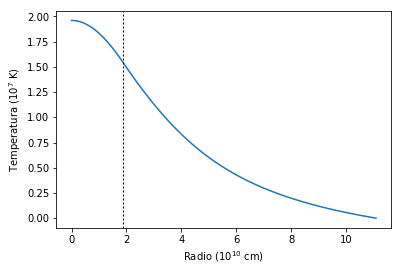

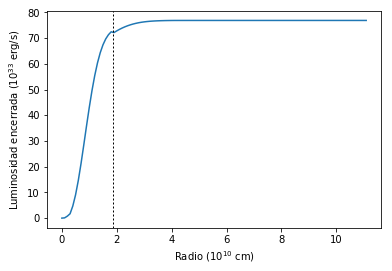

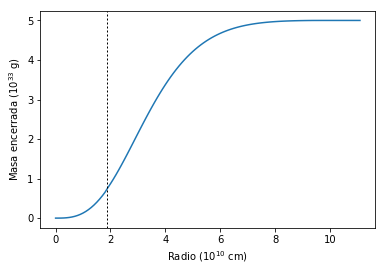

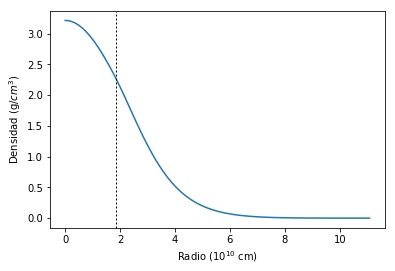

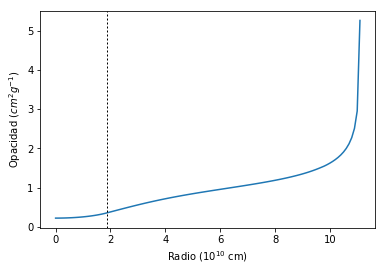

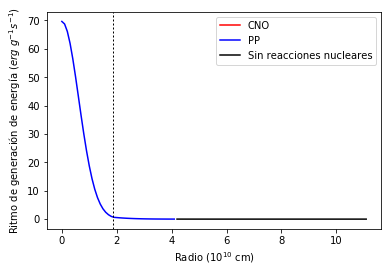

In [32]:
# Parece que hay dos mínimos? En cualquier caso, los dos proporcionan un error muy similar, en torno al
# 2.5 %. Se ha elegido el menor de ellos, que corresponde a los siguientes valores de Rtot y Ltot:

# Modelo con los parámetros óptimos
Tc = 2.0
Rtot = 11.1
Ltot = 76.9
Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
print ('Tc óptima =','{0:.3f}'.format(Tc_optima),'   ','Rtot óptima =','{0:.3f}'.format(Rtot),'   ','Ltot óptima =','{0:.3f}'.format(Ltot),'   ','Error rel. tot. =','{0:.3f}'.format(Error_rel_tot_min),'%')
print ('                                                                 ')
Tc = Tc_optima
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)

In [33]:
# ----------------------- MODELO CON LA ESTRELLA ASIGNADA ---------------------------------------------

In [34]:
# Parámetros constantes

X = 0.80
Y = 0.16
Z = 1 - X - Y
mu = 1/(2*X+0.75*Y+0.5*Z)
Mtot = 4.8

------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.800         Rtot = 11.500
        Y = 0.160         Ltot = 30.000
        Mtot = 4.800      Tc = 1.500
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 11.48850 0.0000000 0.0004568 30.0000000 4.8000000
-- ^^^^^^ -10 11.38500 0.0000000 0.0046091 30.0000000 4.8000000
-- ^^^^^^ -9 11.28150 0.0000000 0.0088376 30.0000000 4.8000000
-- ^^^^^^ -8 11.17800 0.0000002 0.0131444 30.0000000 4.8000000
-- ^^^^^^ -7 11.07450 0.0000007 0.0175318 30.0000000 4.8000000
-- ^^^^^^ -6 10.97100 0.0000019 0.0220019 30.0000000 4.8000000
-- ^^^^^^ -5 10.86750 0.0000042 0.0265571 30.0000000 4.80

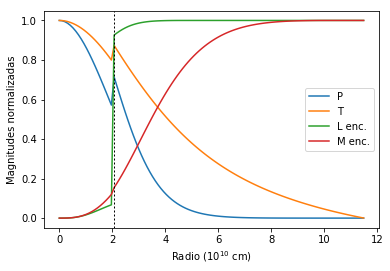

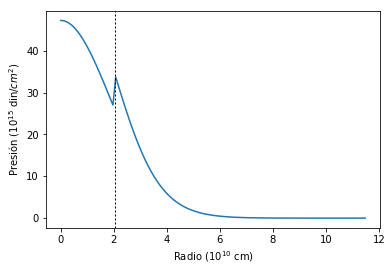

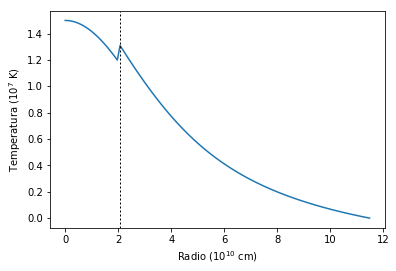

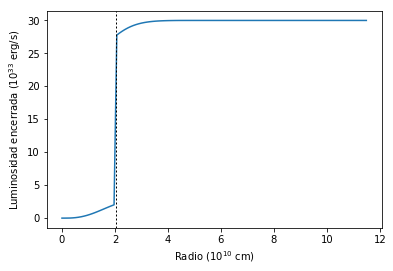

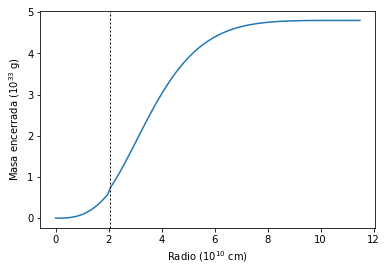

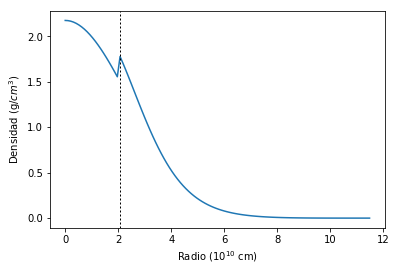

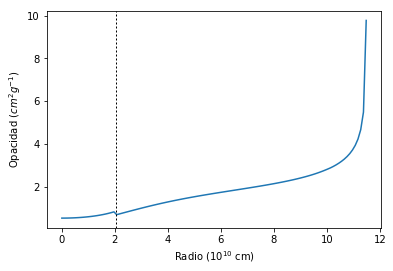

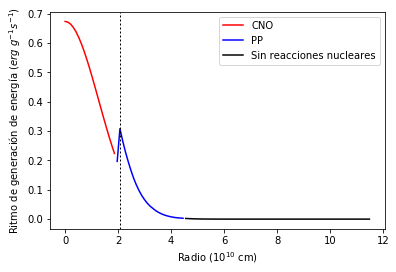

In [35]:
# Modelo con los parámetros iniciales
Tc = 1.5
Rtot = 11.5
Ltot = 30.0
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)
r_inicial = 0.0
h = 0.9*Rtot/100
Error_rel_tot = INTEGRACION_DESDE_EL_CENTRO (Tc,r_inicial,r_primero,r_ultimo,h,mu,K_prima,H,k,X,Z,r0,P0,T0,L0,M0)
print('El error con estos parámetros iniciales es','{0:.2f}'.format(Error_rel_tot),'%')


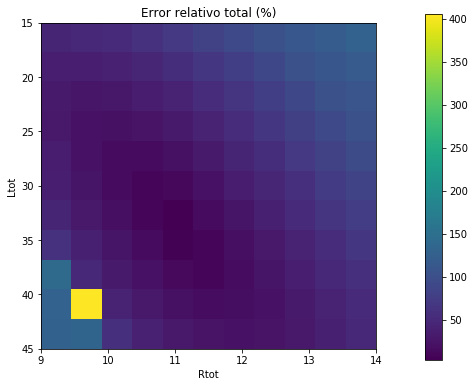

In [36]:
# Búsqueda de los parámetros óptimos

Rtot_central = 11.5
Ltot_central = 30.0
delta_Ltot = 3
delta_Rtot = 0.5
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

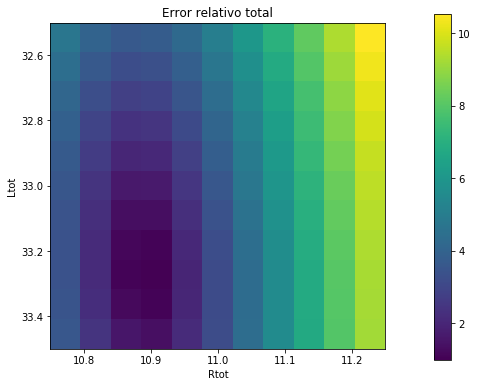

In [37]:
# Se puede ver que el error más bajo se puede conseguir en un entorno cercano a Rtot = 11.0 y
# Ltot = 33.0


# Se prueba ahora con un ajuste más fino en esa región

Ltot_central = 33.0
Rtot_central = 11.0
delta_Ltot = 0.1
delta_Rtot = 0.05
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min

 



fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')

cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Tc óptima = 1.830     Rtot óptima = 10.900     Ltot óptima = 33.300     Error rel. tot. = 0.998 %
                                                                 
------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.800         Rtot = 10.900
        Y = 0.160         Ltot = 33.300
        Mtot = 4.800      Tc = 1.830
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 10.88910 0.0000000 0.0004819 33.3000000 4.8000000
-- ^^^^^^ -10 10.79100 0.0000000 0.0048628 33.3000000 4.8000000
-- ^^^^^^ -9 10.69290 0.0000000 0.0093241 33.3000000 4.8000000
-- ^^^^^^ -8 10.59480 0.0000003 0.0138680 33.3000000 4.8000000
-- ^^^^^^ -7 10.496

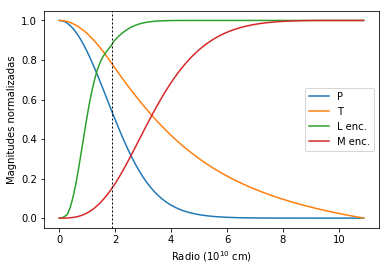

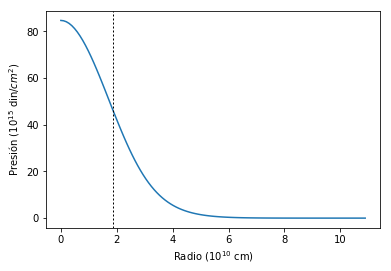

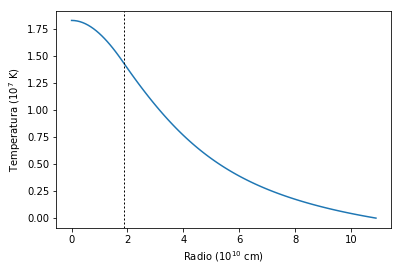

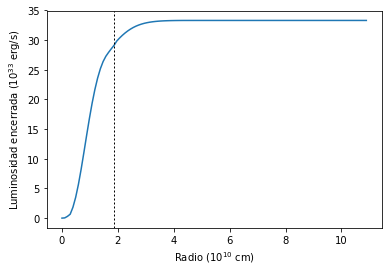

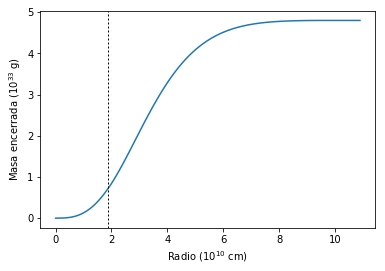

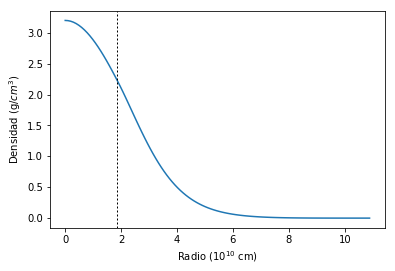

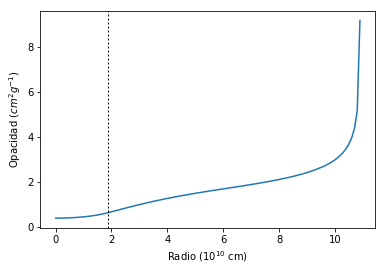

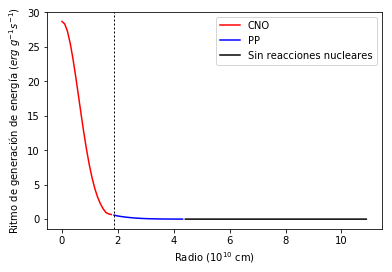

In [38]:
# Se puede ver un mínimo en Rtot = 10.9 y Ltot = 33.3
# Finalmente usamos estos valores para obtener el modelo final.

# Modelo con los parámetros óptimos
Tc = 1.5
Rtot = 10.9
Ltot = 33.3
Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
print ('Tc óptima =','{0:.3f}'.format(Tc_optima),'   ','Rtot óptima =','{0:.3f}'.format(Rtot),'   ','Ltot óptima =','{0:.3f}'.format(Ltot),'   ','Error rel. tot. =','{0:.3f}'.format(Error_rel_tot_min),'%')
print ('                                                                 ')
Tc = Tc_optima
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)

In [39]:
# ----------------------- MODELO CON MASAS DIFERENTES -----------------------------------

In [40]:
# Parámetros constantes

X = 0.80
Y = 0.16
Z = 1 - X - Y
mu = 1/(2*X+0.75*Y+0.5*Z)
Mtot = 4.5

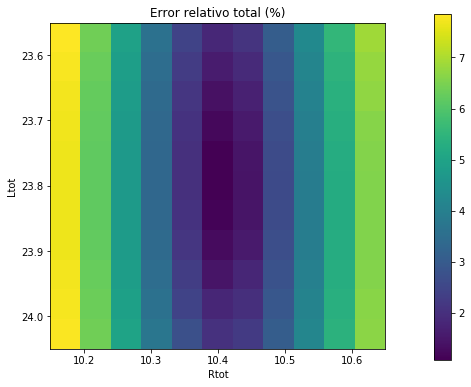

In [41]:
# Búsqueda de los parámetros óptimos

Rtot_central = 10.4
Ltot_central = 23.8
delta_Ltot = 0.05
delta_Rtot = 0.05
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Tc óptima = 1.790     Rtot óptima = 10.400     Ltot óptima = 23.800     Error rel. tot. = 1.086 %
                                                                 
------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.800         Rtot = 10.400
        Y = 0.160         Ltot = 23.800
        Mtot = 4.500      Tc = 1.790
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 10.38960 0.0000000 0.0004735 23.8000000 4.5000000
-- ^^^^^^ -10 10.29600 0.0000000 0.0047781 23.8000000 4.5000000
-- ^^^^^^ -9 10.20240 0.0000000 0.0091616 23.8000000 4.5000000
-- ^^^^^^ -8 10.10880 0.0000003 0.0136263 23.8000000 4.5000000
-- ^^^^^^ -7 10.015

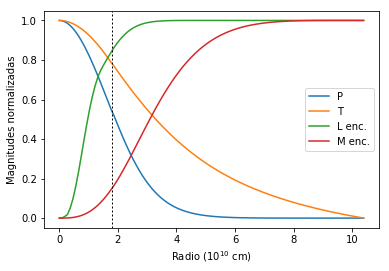

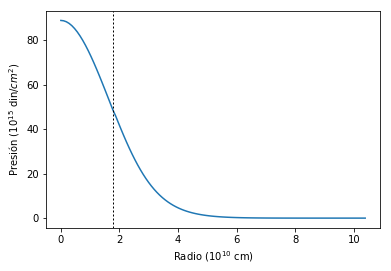

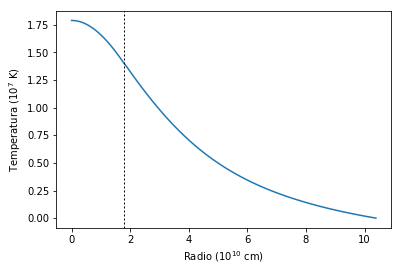

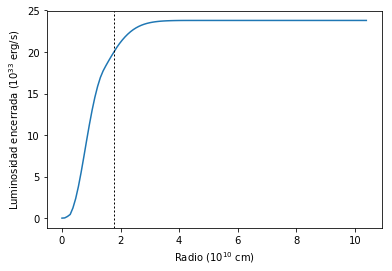

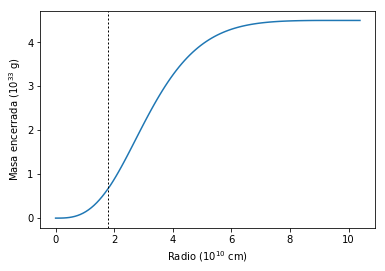

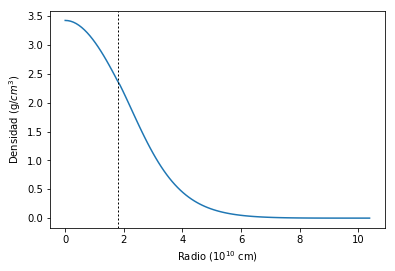

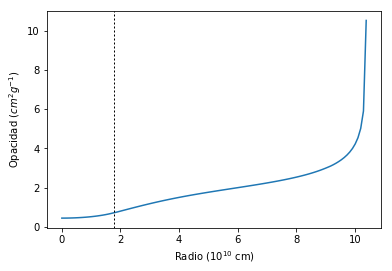

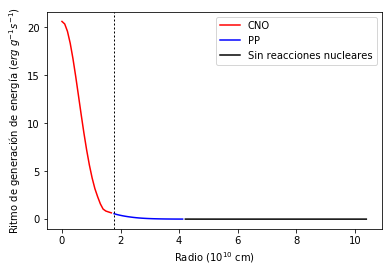

In [42]:
# Se puede ver un mínimo en Rtot = 10.4 y Ltot = 23.8
# Finalmente usamos estos valores para obtener el modelo final.

# Modelo con los parámetros óptimos
Tc = 1.5
Rtot = 10.4
Ltot = 23.8
Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
print ('Tc óptima =','{0:.3f}'.format(Tc_optima),'   ','Rtot óptima =','{0:.3f}'.format(Rtot),'   ','Ltot óptima =','{0:.3f}'.format(Ltot),'   ','Error rel. tot. =','{0:.3f}'.format(Error_rel_tot_min),'%')
print ('                                                                 ')
Tc = Tc_optima
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)

In [43]:
# Parámetros constantes

X = 0.80
Y = 0.16
Z = 1 - X - Y
mu = 1/(2*X+0.75*Y+0.5*Z)
Mtot = 5.1

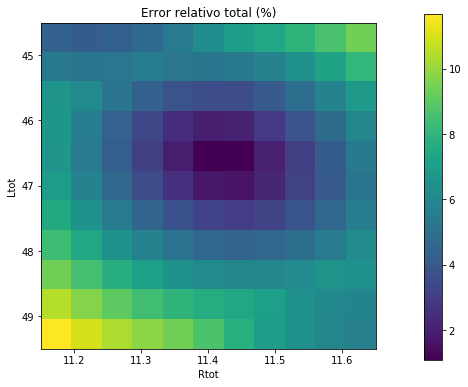

In [44]:
# Búsqueda de los parámetros óptimos

Rtot_central = 11.4
Ltot_central = 47.0
delta_Ltot = 0.5
delta_Rtot = 0.05
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Tc óptima = 1.870     Rtot óptima = 11.400     Ltot óptima = 46.550     Error rel. tot. = 1.091 %
                                                                 
------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.800         Rtot = 11.400
        Y = 0.160         Ltot = 46.550
        Mtot = 5.100      Tc = 1.870
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 11.38860 0.0000000 0.0004896 46.5500000 5.1000000
-- ^^^^^^ -10 11.28600 0.0000000 0.0049401 46.5500000 5.1000000
-- ^^^^^^ -9 11.18340 0.0000000 0.0094723 46.5500000 5.1000000
-- ^^^^^^ -8 11.08080 0.0000002 0.0140885 46.5500000 5.1000000
-- ^^^^^^ -7 10.978

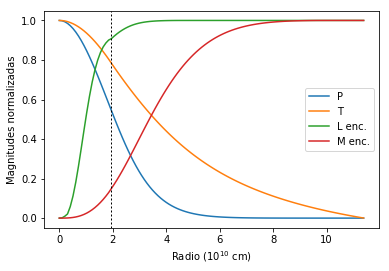

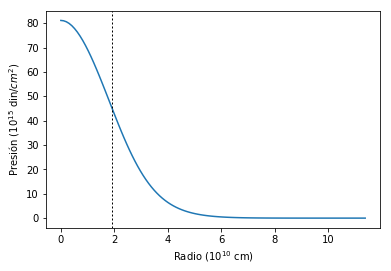

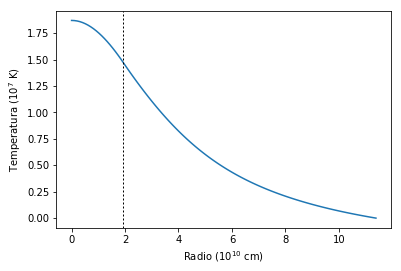

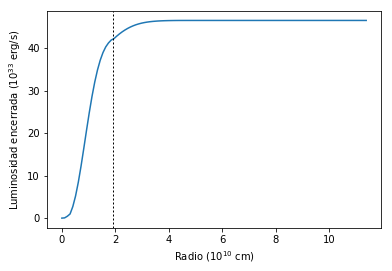

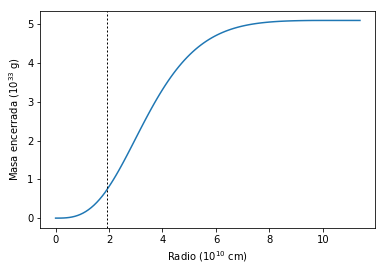

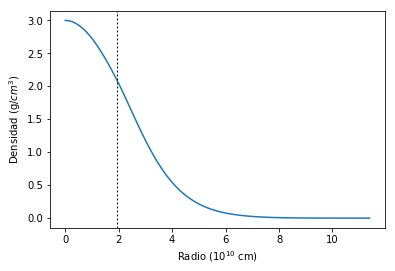

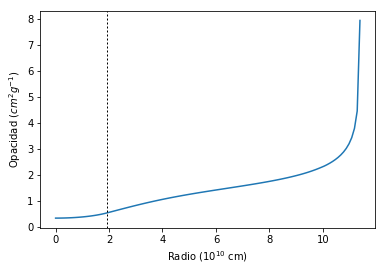

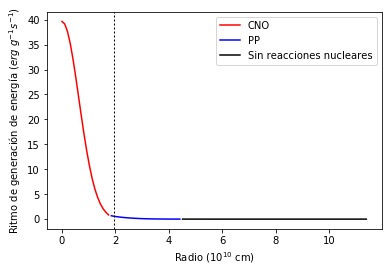

In [45]:
# Modelo con los parámetros óptimos
Tc = 1.5
Rtot = 11.40
Ltot = 46.55
Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
print ('Tc óptima =','{0:.3f}'.format(Tc_optima),'   ','Rtot óptima =','{0:.3f}'.format(Rtot),'   ','Ltot óptima =','{0:.3f}'.format(Ltot),'   ','Error rel. tot. =','{0:.3f}'.format(Error_rel_tot_min),'%')
print ('                                                                 ')
Tc = Tc_optima
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)

In [46]:


Ltot_1 = 23.8
Rtot_1 = 10.4
Mtot_1 = 4.5


Ltot_original = 33.3
Rtot_original = 10.9
Mtot_original = 4.8


Ltot_2 = 46.5
Rtot_2 = 11.4
Mtot_2 = 5.1

ln_Rtot = [np.log(Rtot_1),np.log(Rtot_original),np.log(Rtot_2)]
ln_Ltot = [np.log(Ltot_1),np.log(Ltot_original),np.log(Ltot_2)]
ln_Mtot = [np.log(Mtot_1),np.log(Mtot_original),np.log(Mtot_2)]
n = ['Estrella 1','Estrella original', 'Estrella 2']








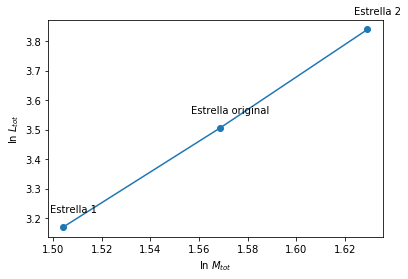

LinregressResult(slope=5.349570801424621, intercept=-4.879544255860052, rvalue=0.9998663763497929, pvalue=0.01040738504409939, stderr=0.08746194491112302)

In [47]:
#Comprobación de la relación homóloga
plt.figure()
plt.xlabel('ln $M_{tot}$')
plt.ylabel('ln $L_{tot}$')
plt.plot(ln_Mtot,ln_Ltot,'o-')


i = 0
for x,y in zip(ln_Mtot,ln_Ltot):
    label = n[i]
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(10,15),ha='center') 
    i = i + 1
plt.show()

linregress(ln_Mtot, ln_Ltot)

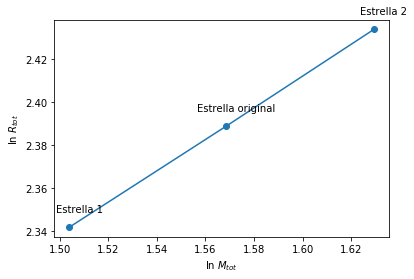

LinregressResult(slope=0.7334394260969457, intercept=1.2385327610169925, rvalue=0.9999884504833557, pvalue=0.0030596901143270603, stderr=0.003525047034216277)

In [48]:
#Comprobación de la relación homóloga
plt.figure()
plt.xlabel('ln $M_{tot}$')
plt.ylabel('ln $R_{tot}$')
plt.plot(ln_Mtot,ln_Rtot,'o-')


i = 0
for x,y in zip(ln_Mtot,ln_Rtot):
    label = n[i]
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(10,15),ha='center') 
    i = i + 1
plt.show()

linregress(ln_Mtot, ln_Rtot)

In [49]:
# ----------------------- MODELO CON COMPOSICIÓN QUÍMICA DIFERENTE ---------------------------

In [50]:
# Parámetros constantes

X = 0.7
Y = 0.25
Z = 1 - X - Y
mu = 1/(2*X+0.75*Y+0.5*Z)
Mtot = 4.8

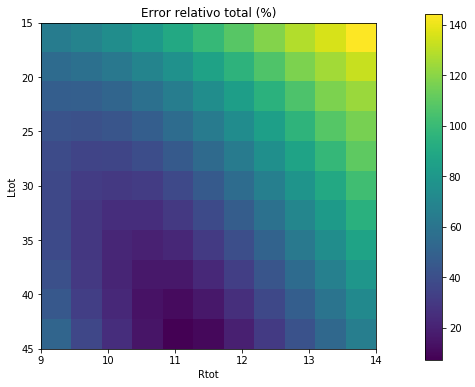

In [51]:
# Búsqueda de los parámetros óptimos

Rtot_central = 11.5
Ltot_central = 30.0
delta_Ltot = 3
delta_Rtot = 0.5
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

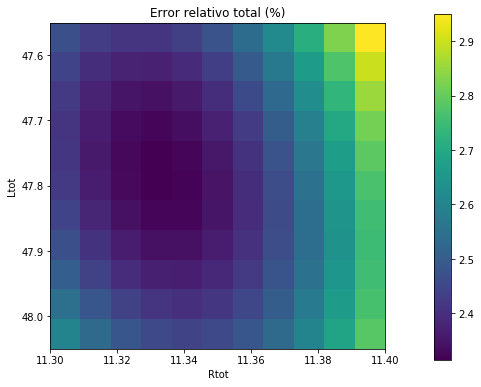

In [59]:
# Búsqueda de los parámetros óptimos

Rtot_central = 11.35
Ltot_central = 47.8
delta_Ltot = 0.05
delta_Rtot = 0.01
numero_deltas_hacia_un_lado = 5
Ltot_inicial = Ltot_central - numero_deltas_hacia_un_lado*delta_Ltot
Rtot_inicial = Rtot_central - numero_deltas_hacia_un_lado*delta_Rtot
Tc_optima_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
Error_rel_tot_matriz = [ [ None for i in range(2*numero_deltas_hacia_un_lado + 1) ] for j in range(2*numero_deltas_hacia_un_lado + 1) ]
for i in range(0,2*numero_deltas_hacia_un_lado + 1):
    Rtot = Rtot_inicial + i*delta_Rtot 
    for p in range(0,2*numero_deltas_hacia_un_lado + 1):
        Ltot = Ltot_inicial + p*delta_Ltot
        Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
        Tc_optima_matriz[p][i] = Tc_optima
        Error_rel_tot_matriz[p][i] = Error_rel_tot_min
        


fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111)
ax.set_title('Error relativo total (%)')
plt.imshow(Error_rel_tot_matriz, origin='upper', interpolation = 'none', extent=[Rtot_central-numero_deltas_hacia_un_lado*delta_Rtot,Rtot_central+numero_deltas_hacia_un_lado*delta_Rtot,Ltot_central+numero_deltas_hacia_un_lado*delta_Ltot,Ltot_central-numero_deltas_hacia_un_lado*delta_Ltot])
ax.set_aspect('auto')
cax = fig.add_axes([0.35, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
ax.set_xlabel('Rtot')
ax.set_ylabel('Ltot')
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Tc óptima = 1.880     Rtot óptima = 11.330     Ltot óptima = 47.800     Error rel. tot. = 2.315 %
                                                                 
------------------------------- Modelo completo ---------------------------------------------
                                                                                             
        X = 0.700         Rtot = 11.330
        Y = 0.250         Ltot = 47.800
        Mtot = 4.800      Tc = 1.880
                                                                                             
                                                                                             
E   fase   i     r         P         T          L         M       n+1
-- ^^^^^^ -11 11.31867 0.0000000 0.0005003 47.8000000 4.8000000
-- ^^^^^^ -10 11.21670 0.0000000 0.0050482 47.8000000 4.8000000
-- ^^^^^^ -9 11.11473 0.0000000 0.0096795 47.8000000 4.8000000
-- ^^^^^^ -8 11.01276 0.0000002 0.0143966 47.8000000 4.8000000
-- ^^^^^^ -7 10.910

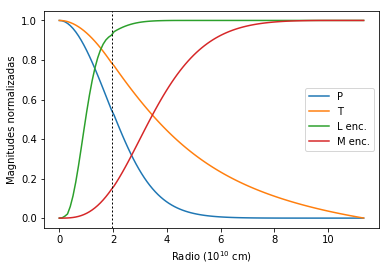

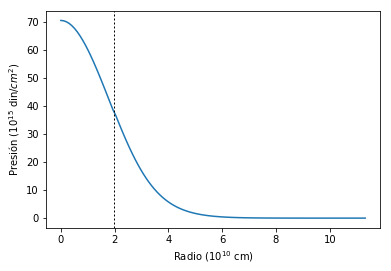

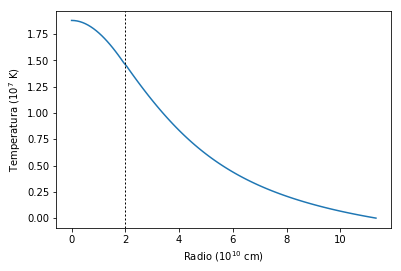

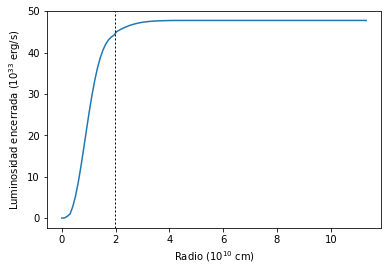

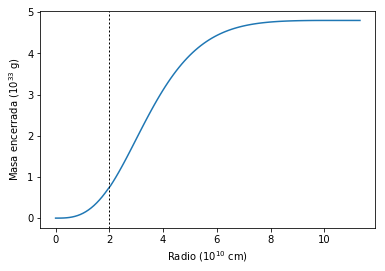

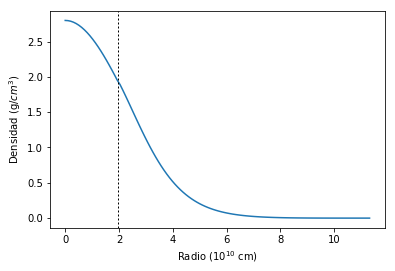

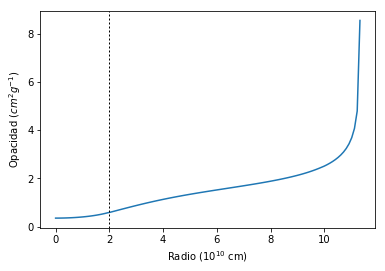

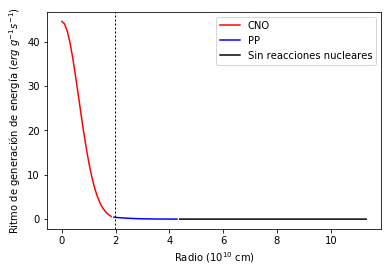

In [63]:
# Modelo con los parámetros óptimos
Tc = 1.5
Rtot = 11.33
Ltot = 47.8
Tc_optima,Error_rel_tot_min = CALCULO_ERROR_REL_Y_TC_OPTIMA (X,Y,Z,Rtot,Ltot,Mtot,mu,H,k,H_entre_k)
print ('Tc óptima =','{0:.3f}'.format(Tc_optima),'   ','Rtot óptima =','{0:.3f}'.format(Rtot),'   ','Ltot óptima =','{0:.3f}'.format(Ltot),'   ','Error rel. tot. =','{0:.3f}'.format(Error_rel_tot_min),'%')
print ('                                                                 ')
Tc = Tc_optima
P,T,L,M,rho,Kappa,r_primero,r_ultimo,r0,P0,T0,L0,M0,K_prima = MODELO_COMPLETO (X,Y,Z,Rtot,Ltot,Mtot,Tc,mu,H,k)